# Predict car prices 

## 1. Import data 

In [1]:
import numpy as np
import pandas as pd
cars = pd.read_csv('imports-85.data')
print(cars.columns)
print(cars.shape)
print(cars.head())

Index(['3', '?', 'alfa-romero', 'gas', 'std', 'two', 'convertible', 'rwd',
       'front', '88.60', '168.80', '64.10', '48.80', '2548', 'dohc', 'four',
       '130', 'mpfi', '3.47', '2.68', '9.00', '111', '5000', '21', '27',
       '13495'],
      dtype='object')
(204, 26)
   3    ?  alfa-romero  gas  std   two  convertible  rwd  front  88.60  ...    \
0  3    ?  alfa-romero  gas  std   two  convertible  rwd  front   88.6  ...     
1  1    ?  alfa-romero  gas  std   two    hatchback  rwd  front   94.5  ...     
2  2  164         audi  gas  std  four        sedan  fwd  front   99.8  ...     
3  2  164         audi  gas  std  four        sedan  4wd  front   99.4  ...     
4  2    ?         audi  gas  std   two        sedan  fwd  front   99.8  ...     

   130  mpfi  3.47  2.68  9.00  111  5000  21  27  13495  
0  130  mpfi  3.47  2.68   9.0  111  5000  21  27  16500  
1  152  mpfi  2.68  3.47   9.0  154  5000  19  26  16500  
2  109  mpfi  3.19  3.40  10.0  102  5500  24  30  13950  
3  

In [3]:
cols = ['symboling','normalized_losses','make','fuel_type','aspiration','num_doors','body_style','drive_wheels','engine_location','wheel_base','length','width','height','curb_weight','engine_type','num_cylinders','engine_size','fuel_system','bore','stroke','compression_ratio','horsepower','peak_rpm','city_mpg','highway_mpg','price']

In [4]:
cars = pd.read_csv('imports-85.data', names=cols)

In [9]:
cars.tail(3)

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470
204,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625


## 2. Clean data

In [6]:
# replace missing values in normalized_losses with nan
cars.replace('?', np.nan, inplace=True)

In [8]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized_losses    164 non-null object
make                 205 non-null object
fuel_type            205 non-null object
aspiration           205 non-null object
num_doors            203 non-null object
body_style           205 non-null object
drive_wheels         205 non-null object
engine_location      205 non-null object
wheel_base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb_weight          205 non-null int64
engine_type          205 non-null object
num_cylinders        205 non-null object
engine_size          205 non-null int64
fuel_system          205 non-null object
bore                 201 non-null object
stroke               201 non-null object
compression_ratio    205 non-null float64
horsepower           203 non-nul

### Upon examination, we found the following columns that are currently non-numeric can be converted to numeric types.
normalized_losses    164 non-null object
num_doors            203 non-null object
num_cylinders        205 non-null object
bore                 201 non-null object
stroke               201 non-null object
horsepower           203 non-null object
peak_rpm             203 non-null object
price                201 non-null object

In [11]:
col2num = ['normalized_losses', 'num_doors', 'num_cylinders', 'bore', 'stroke', 'horsepower', 'peak_rpm', 'price']

In [12]:
cars[col2num]

,normalized_losses,num_doors,num_cylinders,bore,stroke,horsepower,peak_rpm,price
0,NaN,two,four,3.47,2.68,111,5000,13495
1,NaN,two,four,3.47,2.68,111,5000,16500
2,NaN,two,six,2.68,3.47,154,5000,16500
3,164,four,four,3.19,3.40,102,5500,13950
4,164,four,five,3.19,3.40,115,5500,17450
5,NaN,two,five,3.19,3.40,110,5500,15250
6,158,four,five,3.19,3.40,110,5500,17710
7,NaN,four,five,3.19,3.40,110,5500,18920
8,158,four,five,3.13,3.40,140,5500,23875
9,NaN,two,five,3.13,3.40,160,5500,NaN


In [13]:
col2num1 = ['normalized_losses', 'bore', 'stroke', 'horsepower', 'peak_rpm', 'price']
col2num2 = ['num_doors', 'num_cylinders']

In [14]:
cars[col2num1].head()

,normalized_losses,bore,stroke,horsepower,peak_rpm,price
0,NaN,3.47,2.68,111,5000,13495
1,NaN,3.47,2.68,111,5000,16500
2,NaN,2.68,3.47,154,5000,16500
3,164,3.19,3.40,102,5500,13950
4,164,3.19,3.40,115,5500,17450


In [25]:
cars[col2num1] = cars[col2num1].astype('float')

In [26]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized_losses    164 non-null float64
make                 205 non-null object
fuel_type            205 non-null object
aspiration           205 non-null object
num_doors            203 non-null object
body_style           205 non-null object
drive_wheels         205 non-null object
engine_location      205 non-null object
wheel_base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb_weight          205 non-null int64
engine_type          205 non-null object
num_cylinders        205 non-null object
engine_size          205 non-null int64
fuel_system          205 non-null object
bore                 201 non-null float64
stroke               201 non-null float64
compression_ratio    205 non-null float64
horsepower           203 non-

In [33]:
cars[col2num2].iloc[:,0].value_counts()

four    114
two      89
Name: num_doors, dtype: int64

In [34]:
cars[col2num2].iloc[:,1].value_counts()

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: num_cylinders, dtype: int64

In [39]:
cars[col2num2] = cars[col2num2].replace('four', '4').replace('two', '2').replace('six','6').replace('five', '5').replace('eight', '8').replace('three', '3').replace('twelve', '12')

In [42]:
cars[col2num2] = cars[col2num2].astype('float')

In [43]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized_losses    164 non-null float64
make                 205 non-null object
fuel_type            205 non-null object
aspiration           205 non-null object
num_doors            203 non-null float64
body_style           205 non-null object
drive_wheels         205 non-null object
engine_location      205 non-null object
wheel_base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb_weight          205 non-null int64
engine_type          205 non-null object
num_cylinders        205 non-null float64
engine_size          205 non-null int64
fuel_system          205 non-null object
bore                 201 non-null float64
stroke               201 non-null float64
compression_ratio    205 non-null float64
horsepower           203 no

In [45]:
cars['normalized_losses'].isnull().sum()

41

### Normalized losses has 41 missing data comparing a total row number of 205. Suggest replacing missing value with average instead of removing them to cause a big drop in the number of observations. 

In [52]:
print(cars['normalized_losses'].mean())
print(cars['normalized_losses'].median())

122.0
115.0


In [50]:
cars['normalized_losses'].value_counts().sort_index()

65.0      5
74.0      5
77.0      1
78.0      1
81.0      2
83.0      3
85.0      5
87.0      2
89.0      2
90.0      1
91.0      8
93.0      4
94.0      5
95.0      5
98.0      1
101.0     3
102.0     5
103.0     5
104.0     6
106.0     4
107.0     1
108.0     2
110.0     2
113.0     2
115.0     3
118.0     4
119.0     2
121.0     1
122.0     4
125.0     3
128.0     6
129.0     2
134.0     6
137.0     3
142.0     1
145.0     2
148.0     4
150.0     7
153.0     2
154.0     3
158.0     2
161.0    11
164.0     2
168.0     5
186.0     1
188.0     2
192.0     2
194.0     2
197.0     2
231.0     1
256.0     1
Name: normalized_losses, dtype: int64

In [53]:
cars['normalized_losses'].fillna(cars['normalized_losses'].mean(), inplace=True)

In [54]:
cars['normalized_losses'].isnull().sum()

0

In [55]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized_losses    205 non-null float64
make                 205 non-null object
fuel_type            205 non-null object
aspiration           205 non-null object
num_doors            203 non-null float64
body_style           205 non-null object
drive_wheels         205 non-null object
engine_location      205 non-null object
wheel_base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb_weight          205 non-null int64
engine_type          205 non-null object
num_cylinders        205 non-null float64
engine_size          205 non-null int64
fuel_system          205 non-null object
bore                 201 non-null float64
stroke               201 non-null float64
compression_ratio    205 non-null float64
horsepower           203 no

### For other columns with missing data, since the numbers of missing values are not big (< 5), just remove the whole rows with missing values

In [62]:
cars.dropna(axis=0, inplace=True)

In [63]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193 entries, 0 to 204
Data columns (total 26 columns):
symboling            193 non-null int64
normalized_losses    193 non-null float64
make                 193 non-null object
fuel_type            193 non-null object
aspiration           193 non-null object
num_doors            193 non-null float64
body_style           193 non-null object
drive_wheels         193 non-null object
engine_location      193 non-null object
wheel_base           193 non-null float64
length               193 non-null float64
width                193 non-null float64
height               193 non-null float64
curb_weight          193 non-null int64
engine_type          193 non-null object
num_cylinders        193 non-null float64
engine_size          193 non-null int64
fuel_system          193 non-null object
bore                 193 non-null float64
stroke               193 non-null float64
compression_ratio    193 non-null float64
horsepower           193 no

### Keep only the numeric columns and normalize them to 0-1

In [67]:
cars_numeric = cars.select_dtypes(exclude='object').copy()

In [74]:
cars_normalized = (cars_numeric - cars_numeric.mean())/(cars_numeric.std())

In [85]:
cars_normalized['price'] = cars_numeric['price']

## 3. K-Nearest neighbors modeling using a single feature (univariant). Keep it simple and use the 75%/25% train/test validation.  

In [87]:
cars_normalized.head(3)

,symboling,normalized_losses,num_doors,wheel_base,length,width,height,curb_weight,num_cylinders,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,1.782215,0.022108,-1.172839,-1.678015,-0.442872,-0.83908,-2.117092,-0.025646,-0.410180,0.045098,0.511697,-1.803495,-0.287525,0.198054,-0.212806,-0.677292,-0.555613,13495.0
1,1.782215,0.022108,-1.172839,-1.678015,-0.442872,-0.83908,-2.117092,-0.025646,-0.410180,0.045098,0.511697,-1.803495,-0.287525,0.198054,-0.212806,-0.677292,-0.555613,16500.0
2,0.163544,0.022108,-1.172839,-0.719041,-0.250543,-0.18420,-0.613816,0.496473,1.544506,0.574066,-2.388614,0.701095,-0.287525,1.330822,-0.212806,-0.990387,-0.702307,16500.0


In [110]:
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor

# define a modeling function
def knn_train_test(training_col, target_col, df, k):
    # randomly resort the rows
    np.random.seed(1)
    df_temp = df.iloc[np.random.permutation(df.shape[0])]
    rows = int(df.shape[0] * 0.75)
    df_train = df_temp.iloc[:rows]
    df_test = df_temp.iloc[rows:]
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(df_train[[training_col]], df_train[target_col])
    predictions = knn.predict(df_test[[training_col]])
    mse = mean_squared_error(df_test[target_col], predictions)
    return mse**0.5  

In [88]:
knn_train_test('normalized_losses', 'price', cars_normalized, 5)

6658.5333464445675

In [92]:
k_range = list(range(1,11, 2))

In [99]:
training_cols = list(cars_normalized.columns)

In [101]:
training_cols.remove('price')

In [115]:
# for each k value, and each column as the feature column, run modeling and return RMSE
rmse = pd.DataFrame(index=k_range, columns=training_cols)

for k in k_range:
    for col in training_cols:
        rmse.loc[k, col] = knn_train_test(col, 'price', cars_normalized, k)

In [116]:
rmse

,symboling,normalized_losses,num_doors,wheel_base,length,width,height,curb_weight,num_cylinders,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg
1,12765,6083,9455.27,4428.05,5046.82,4153.75,9839.04,5052.84,7660.78,2862.36,12189.3,9885.64,4784.36,4214.97,6368.4,6415.1,4508
3,8731.82,6512.21,8945.38,5086.24,5272.21,3312.96,8187.33,3527.19,4329.38,2843.41,6625.29,5916.24,5293.93,3959.97,5329.24,4112.93,4447.39
5,7520.17,6389.44,8808.13,5656.52,5363.39,3697.44,7875.78,2927.72,4113.39,3037.85,5954.67,6742.53,5125.62,4556.06,6043.52,3801.31,4101.09
7,7041.15,6903.1,8882.03,5425.5,5719.76,3519.16,7899.53,2934.26,4417.05,3195.87,6746.27,6685.25,5973.75,4804.53,6072.12,3953.15,3808.66
9,7024.2,7186.18,9282.37,5354.12,5557.28,3460.77,7689.41,2600.41,4889.77,2901.63,6681.28,6983.95,6406.42,4972.9,6642.55,4344.62,3348.21


/dataquest/system/env/python3/lib/python3.4/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


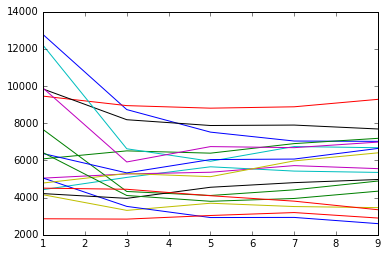

In [124]:
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure()
plt.plot(rmse.index, rmse)
plt.legend()
plt.show()

### The RMSE plot shows that after a k value of 5, the RMSE are quite stable. Therefore we can use the average value from 5 to 9 to rank the training feature columns and find out the best features to predict car price. 

In [127]:
rmse.loc[5:].mean().sort_values()

curb_weight          2820.797081
engine_size          3045.115746
width                3559.124642
highway_mpg          3752.655769
city_mpg             4033.027111
num_cylinders        4473.404897
horsepower           4777.831442
wheel_base           5478.714332
length               5546.810428
compression_ratio    5835.264756
peak_rpm             6252.732282
bore                 6460.739967
stroke               6803.911361
normalized_losses    6826.238061
symboling            7195.171459
height               7821.573562
num_doors            8990.840109
dtype: float64

In [130]:
# best 5 features to predict car price
rmse.loc[5:].mean().sort_values().index[:5]

Index(['curb_weight', 'engine_size', 'width', 'highway_mpg', 'city_mpg'], dtype='object')

## 4. K-Nearest neighbors modeling using multiple features (multivariant). Keep it simple and use the 75%/25% train/test validation.

In [131]:

# define a modeling function
def knn_train_test_mul(training_cols, target_col, df, k):
    # randomly resort the rows
    np.random.seed(2)
    df_temp = df.iloc[np.random.permutation(df.shape[0])]
    rows = int(df.shape[0] * 0.75)
    df_train = df_temp.iloc[:rows]
    df_test = df_temp.iloc[rows:]
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(df_train[training_cols], df_train[target_col])
    predictions = knn.predict(df_test[training_cols])
    mse = mean_squared_error(df_test[target_col], predictions)
    return mse**0.5 

In [133]:
# using all columns as training features
knn_train_test_mul(training_cols, 'price', cars_normalized, 5)

4225.713546218422

In [135]:
rmse_best_features = {}
for i in range(2,6):
    best_cols = list(rmse.loc[5:].mean().sort_values().index[:i])
    rmse_best_features[i] = knn_train_test_mul(best_cols, 'price', cars_normalized, 5)

In [136]:
rmse_best_features

{2: 3536.4437279301264,
 3: 3966.4466167169458,
 4: 3987.4207627979063,
 5: 3978.838675302334}

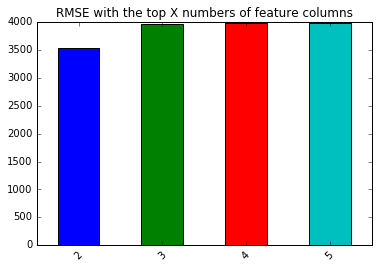

In [154]:
rmse_best_features_s.plot.bar(rot=45, title='RMSE with the top X numbers of feature columns')

### It appears that using more columns doesn't improve the prediction. Using the top 2 feature columns gives the best model 

## 5. Hyperparameter tuning

In [155]:
# vary k value from 1 to 25
k_range2 = range(1,26)

rmse_hyper = pd.DataFrame(index=k_range2, columns=range(2,6))

for k in k_range2:
    for i in range(2,6):
        best_cols = list(rmse.loc[5:].mean().sort_values().index[:i])
        rmse_hyper.loc[k,i] = knn_train_test_mul(best_cols, 'price', cars_normalized, k)


In [156]:
rmse_hyper

,2,3,4,5
1,3444.98,2957.88,2562.1,2871.24
2,3194.84,3145.12,2986.24,3157.32
3,3130.73,3423.36,3493.83,3671.86
4,3433.31,3723.53,3820.93,3759.9
5,3536.44,3966.45,3987.42,3978.84
6,3652.3,4085.21,4121.85,4045.44
7,3742.12,4059.5,4070.86,4064.16
8,3871.44,4083.95,4138.24,4120.97
9,3784.52,4007.22,4068.59,3959.66
10,3744.52,4056.07,4075.16,4057.46


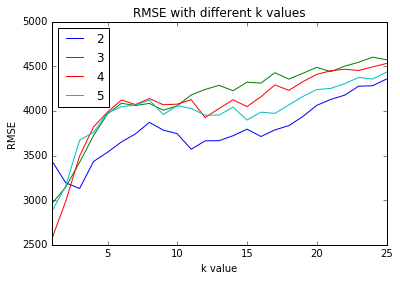

In [160]:
rmse_hyper.plot(title='RMSE with different k values')
plt.xlabel('k value')
plt.ylabel('RMSE')

### Looks like high k values lead to bigger errors. 

## 6. K-fold cross validation. 

In [166]:
from sklearn.model_selection import cross_val_score, KFold

# define a modeling function
def knn_kfold_xvld(training_col, target_col, df, fold, n_nbr):
    kf = KFold(fold, shuffle=True, random_state=1)
    knn = KNeighborsRegressor(n_neighbors=n_nbr)
    mser = cross_val_score(knn, df[training_col], df[target_col], scoring='neg_mean_squared_error', cv=kf)
    return np.mean(np.sqrt(np.abs(mser))) 

In [167]:
training_col = list(rmse.loc[5:].mean().sort_values().index[:2])
knn_kfold_xvld(training_col, 'price', cars_normalized, 10, 5)

3171.2587465873635

In [180]:
folds = range(2, 51)
col_list = []
for i in range(2,6):
    col_list.append('Top {} features'.format(i))

rmse_kfold = pd.DataFrame(index=folds, columns=col_list)

for fold in range(2,51):
    for i in range(2,6):
        best_cols = list(rmse.loc[5:].mean().sort_values().index[:i])
        rmse_kfold.loc[fold, col_list[i-2]] = knn_kfold_xvld(best_cols, 'price', cars_normalized, fold, 5)



In [181]:
rmse_kfold

,Top 2 features,Top 3 features,Top 4 features,Top 5 features
2,3595.55,3696.22,3759.61,3749.71
3,3367.22,3467.8,3479.78,3494.47
4,3311.68,3261.67,3328.24,3285.73
5,3256.49,3250.6,3304.71,3277.72
6,3203.96,3198.71,3236.82,3199.05
7,3222.26,3133.85,3145.02,3112.29
8,3217.55,3112.54,3172.03,3124.78
9,3164.54,3078.21,3153.77,3150.69
10,3171.26,3109.01,3173.99,3147.55
11,3120.86,3000.64,3083.38,3083.39


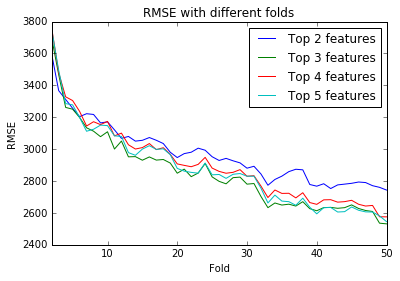

In [183]:
rmse_kfold.plot(title='RMSE with different folds')
plt.xlabel('Fold')
plt.ylabel('RMSE')

### With k-fold cross validation, it appears that more folds gives better models. 